In [265]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')


data_train_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Train.xlsx")
data_test_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Test.xlsx")

data_train = pd.read_excel(data_train_path)
data_test = pd.read_excel(data_test_path)
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


## The Data-Preprocessing part

In [266]:
df1 = data_train[data_train.isna().any(axis=1)]
df2 = data_test[data_test.isna().any(axis=1)]

# Null present as string in the data 
data_test_null_string = data_test[data_test['Power'].str.contains('null' , na = True)]


columns_to_be_filled_with_NaN = ["Power"]

def fill_columns_with_NaN(columns_to_be_filled_with_NaN):
    for i in range (len(columns_to_be_filled_with_NaN)):    
        data_train[columns_to_be_filled_with_NaN[i]] = data_train[columns_to_be_filled_with_NaN[i]].replace(to_replace="[null]" , value = np.NaN , regex = True)
        data_test[columns_to_be_filled_with_NaN[i]] = data_test[columns_to_be_filled_with_NaN[i]].replace(to_replace="[null]" , value = np.NaN , regex = True)

fill_columns_with_NaN(columns_to_be_filled_with_NaN)

empty_cols_list_train = ["Mileage","Engine","Power","Seats"] 
empty_cols_list_test = ["Engine","Power","Seats"] 


def my_Nan_filling_function(dataset , empty_cols_list):
    for i in range(len(empty_cols_list)):
        
        # Replacing Nan with mean values
        # dataset[empty_cols_list[i]].fillna(dataset[empty_cols_list[i]].mean , inplace = True)
        
        # Replacing Nan with mode values
        dataset[empty_cols_list[i]].fillna(dataset[empty_cols_list[i]].mode()[0] , inplace = True)

    print(dataset)

my_Nan_filling_function(data_train , empty_cols_list_train)

my_Nan_filling_function(data_test , empty_cols_list_test)

list_of_columns_with_units = ["Mileage" , "Engine" , "Power"] 

def remove_units_from_columns(list_of_columns_with_units):
    for i in range(len(list_of_columns_with_units)):
        data_train[list_of_columns_with_units[i]] = data_train[list_of_columns_with_units[i]].str.split(" " , expand = True)
        data_train[list_of_columns_with_units[i]] = data_train[list_of_columns_with_units[i]].astype("float")
        data_test[list_of_columns_with_units[i]] = data_test[list_of_columns_with_units[i]].str.split(" " , expand = True)
        data_test[list_of_columns_with_units[i]] = data_test[list_of_columns_with_units[i]].astype("float")

remove_units_from_columns(list_of_columns_with_units)

data_train["Year"] = data_train["Year"].astype("int32" , copy = False)
data_test["Year"] = data_test["Year"].astype("int32" , copy = False)

                                  Name    Location  ...  Seats  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...    5.0   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...    5.0  12.50
2                         Honda Jazz V     Chennai  ...    5.0   4.50
3                    Maruti Ertiga VDI     Chennai  ...    7.0   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...    5.0  17.74
...                                ...         ...  ...    ...    ...
6014                  Maruti Swift VDI       Delhi  ...    5.0   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...    5.0   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...    8.0   2.90
6017                Maruti Wagon R VXI     Kolkata  ...    5.0   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...    5.0   2.50

[6019 rows x 12 columns]
                                                   Name  ... Seats
0                               Maruti Alto K10 LXI CNG  ...   4.0


## Removing the outliers part

In [267]:
def get_numerical_features(dataset):
    df = dataset
    df_numerics_only = df.select_dtypes(include=np.number)
    # print(df_numerics_only)
    colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
    # print(colnames_numerics_only)
    return colnames_numerics_only

df_train = get_numerical_features(data_train)
print(df_train)

df_test = get_numerical_features(data_test)
print(df_test)

print(data_train.shape)

remove_train_outliers_list = df_train
remove_test_outliers_list = df_test

def remove_outliers(dataset , remove_outliers_list):
    # Iterating across the list of numerical categories for which the outliers have to be removed
    for i in range(len(remove_outliers_list)):
        # Change the value of the outlier criterion for better results
        dataset.drop(dataset[dataset[remove_outliers_list[i]] >=( 0.99999 * dataset[remove_outliers_list[i]].max()) ].index, inplace = True )

remove_outliers(data_train , remove_train_outliers_list)
remove_outliers(data_test , remove_test_outliers_list)

print(data_train.shape)

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
(6019, 12)
(5903, 12)


## Skipping the EDA part (in the other notebook)

In [268]:
"""
 Summary of some of the vairables
"""

'''Actual train data '''
# data_train  
'''Actual train data xlsx file '''
# data_train_path   
'''Actual train data csv file '''
# data_train_csv_path 
''' Only Numerical Features of train data  '''
# df_train  


'''Actual test data '''
# data_test  
'''Actual test data xlsx file '''
# data_test_path   
'''Actual test data csv file '''
# data_test_csv_path 
''' Only Numerical Features of test data  '''
# df_test  


' Only Numerical Features of test data  '

# Feature Engineering and Feature Selection

## A. Feature Selection with Filtering Methods

- Univarite -> Fisher Score , Mutual Information Gain , Variance , etc.
- Multivariate -> Pearson Correlation

### Univariate Feature Selection

- Constant, Quasi-Constant and Duplicate Feature Removal


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [270]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [271]:
'''
CONSTANT FEATURES REMOVAL
 Dropping Categorical variables Temporarily
 This is necessary for this particaular feature selection method
'''
X = data_train.drop(["Name","Location","Fuel_Type", "Transmission" , "Owner_Type" ,  "Price"] , axis = 1)
y = data_train["Price"]

X.shape , y.shape

((5903, 6), (5903,))

In [272]:
# Stratify doesn't work on Regression Problems
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0 )
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((4722, 6), (1181, 6), (4722,), (1181,))

In [273]:
constant_filter = VarianceThreshold(threshold = 0 )
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [274]:
# Removing the constant features
constant_filter.get_support().sum()

6

In [275]:
# inverting the filter list
constant_list = [not temp for temp in constant_filter.get_support()]
print(constant_list)

[False, False, False, False, False, False]


In [276]:
# Printing the list of constant features
X.columns[constant_list]

Index([], dtype='object')

In [0]:
'''
 Transforming the dataset into non-constant feaure space
 Bascially removing the constant features
 done to prevent overfitting of the model
 '''
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [278]:
X_train_filter.shape, X_test_filter.shape, X_train.shape , X_test.shape

((4722, 6), (1181, 6), (4722, 6), (1181, 6))

In [0]:
'''
QUASI CONSTANT FEATURE REMOVAL
Removing feature almost constant or somewhat near to constant(Quasi Constant)
'''
# This method removes features with variation below a certain cutoff.
quasi_constant_filter = VarianceThreshold(threshold = 0.01)

In [280]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [281]:
quasi_constant_filter.get_support().sum()

6

In [282]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)
X_train.shape,X_test.shape,X_train_filter.shape,X_test_filter.shape, X_train_quasi_filter.shape,X_test_quasi_filter.shape

((4722, 6), (1181, 6), (4722, 6), (1181, 6), (4722, 6), (1181, 6))

In [283]:
'''
DUPLICATE FEATURE REMOVAL
'''
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T
type(X_train_T),type(X_test_T)

(numpy.ndarray, numpy.ndarray)

In [284]:
# Changing it back to Pandas Dataframe
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)
X_train_T.shape , X_test_T.shape

((6, 4722), (6, 1181))

In [285]:
X_train_T.duplicated().sum()

0

In [286]:
# Finding the duplicated features
duplicated_features = X_train_T.duplicated()
print(duplicated_features)

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool


In [287]:
# Inverting the dupkicated list to find the features to keep
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True]


In [288]:
# After removing constant , quasi-constant and duplicate features
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape,X_train.shape

((4722, 6), (4722, 6))

In [289]:
'''
UNFORTUNATELY,there are:
0 constant
0 quasi-constant 
0 duplicate features
'''

'\nUNFORTUNATELY,there are:\n0 constant\n0 quasi-constant \n0 duplicate features\n'

In [0]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [291]:
X_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
1862,2011,68000,17.00,1497.0,118.00,5.0
5181,2015,39208,17.57,1193.0,88.70,5.0
5861,2007,79000,17.00,1086.0,74.00,5.0
4805,2012,47629,15.10,2179.0,140.00,7.0
1477,2009,42000,13.00,2987.0,210.00,5.0
...,...,...,...,...,...,...
5023,2013,30852,22.74,796.0,47.30,5.0
3330,2013,43000,20.50,1598.0,105.00,5.0
1687,2017,47357,18.49,1493.0,100.00,7.0
2657,2012,60000,19.81,1086.0,68.05,5.0


In [292]:
'''
This is a regression problem NOT classification
'''

# def run_random_Forest_Classifiers(X_train,X_test , y_train , y_test):
#     print("The Results of Random Forest Classifier Model")
#     clf = RandomForestClassifier(n_estimators= 100 , random_state = 0 , n_jobs = -1)
#     clf.fit(X_train , y_train)
#     y_pred = clf.predict(X_test)
#     print("Accuracy based on Random Forest Classifier on the testing set:")
#     print(accuracy_score(y_test , y_pred))
#     print()

'''
Random Forest Regressor to be checked later
'''
# def run_random_Forest_Regressor(X_train,X_test , y_train , y_test):
#     print("The Results of Random Forest Regressor Model")
#     reg = RandomForestRegressor(n_estimators= 100 , random_state = 0 , n_jobs = -1)
#     reg.fit(X_train , y_train)

#     # X_train= X_train.reshape(-1, 1)
#     # y_train= y_train.reshape(-1, 1)
#     # X_test = X_test.reshape(-1, 1)

#     y_pred = reg.predict([[X_test]])
#     print("Accuracy based on Random Forest Regressor on the testing set:")
#     print(reg.score(y_test , y_pred))
#     print()

def run_Linear_Regression(X_train, X_test, y_train , y_test):
    print("The Results of Linear Regression Model")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print("The R2 score is:" , r2_score(y_test, y_predict))
    print("The RMSE is:" , np.sqrt(mean_squared_error(y_test , y_predict)))
    print("The Standard deviation of y is ",np.std(y))
    print()

# %%time
run_Linear_Regression(X_train , X_test, y_train , y_test)
# %%time
run_Linear_Regression(X_train_filter , X_test_filter, y_train , y_test)
# %%time
run_Linear_Regression(X_train_quasi_filter , X_test_quasi_filter, y_train , y_test)
# %%time
run_Linear_Regression(X_train_unique , X_test_unique, y_train , y_test)

# # %%time
# run_random_Forest_Regressor(X_train , X_test, y_train , y_test)
# # %%time
# run_random_Forest_Regressor(X_train_filter , X_test_filter, y_train , y_test)
# # %%time
# run_random_Forest_Regressor(X_train_quasi_filter , X_test_quasi_filter, y_train , y_test)
# # %%time
# run_random_Forest_Regressor(X_train_unique , X_test_unique, y_train , y_test)

The Results of Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654



### Multivaraite Feature Selection

- Correlation between the feature space and the output is desirable but correlation amongst features is not desirable

- Correlated features are redundant and can lead to curse of dimensionality


In [0]:
corrmat = X_train_unique.corr()

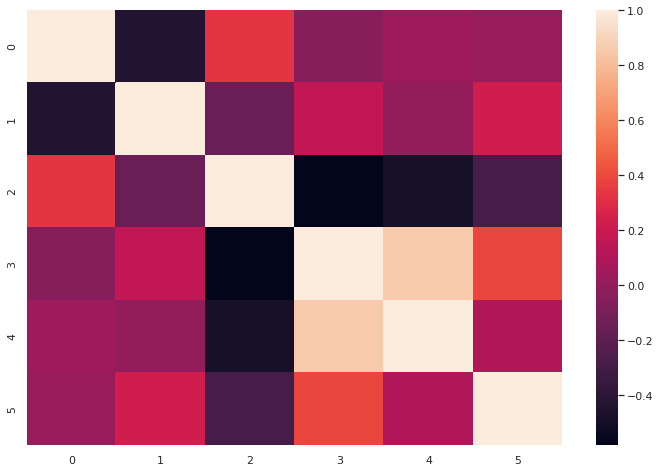

In [294]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [295]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_train_unique , 0.85)
print(corr_features)

{4}


In [296]:
len(corr_features)

1

In [297]:
X_train_uncorr = X_train_unique.drop(labels = corr_features , axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features , axis = 1)
X_train_uncorr.shape,X_test_uncorr.shape

((4722, 5), (1181, 5))

In [298]:
# %%time
# run_random_Forest_Classifiers(X_train, X_test , y_train , y_test)
# %%time
# run_random_Forest_Classifiers(X_train_uncorr , X_test_uncorr , y_train , y_test)
%%time
run_Linear_Regression(X_train, X_test , y_train , y_test)

run_Linear_Regression(X_train_uncorr , X_test_uncorr , y_train , y_test)

The Results of Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model
The R2 score is: 0.6274416701527743
The RMSE is: 6.360441491818243
The Standard deviation of y is  10.631763524207654

CPU times: user 16.7 ms, sys: 12 ms, total: 28.6 ms
Wall time: 35.4 ms


In [299]:
corrmat

,0,1,2,3,4,5
0,1.000000,-0.437531,0.330339,-0.043516,0.041005,0.018678
1,-0.437531,1.000000,-0.151534,0.166506,0.003675,0.228811
2,0.330339,-0.151534,1.000000,-0.582761,-0.481614,-0.291775
3,-0.043516,0.166506,-0.582761,1.000000,0.858913,0.393449
4,0.041005,0.003675,-0.481614,0.858913,1.000000,0.107889
5,0.018678,0.228811,-0.291775,0.393449,0.107889,1.000000


In [300]:
# Stacking of the features
corrdata = corrmat.abs().stack()
corrdata

0  0    1.000000
   1    0.437531
   2    0.330339
   3    0.043516
   4    0.041005
   5    0.018678
1  0    0.437531
   1    1.000000
   2    0.151534
   3    0.166506
   4    0.003675
   5    0.228811
2  0    0.330339
   1    0.151534
   2    1.000000
   3    0.582761
   4    0.481614
   5    0.291775
3  0    0.043516
   1    0.166506
   2    0.582761
   3    1.000000
   4    0.858913
   5    0.393449
4  0    0.041005
   1    0.003675
   2    0.481614
   3    0.858913
   4    1.000000
   5    0.107889
5  0    0.018678
   1    0.228811
   2    0.291775
   3    0.393449
   4    0.107889
   5    1.000000
dtype: float64

In [301]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ["features1" , "features2" , "corr_value"]
corrdata

,features1,features2,corr_value
0,0,0,1.000000
1,0,1,0.437531
2,0,2,0.330339
3,0,3,0.043516
4,0,4,0.041005
5,0,5,0.018678
6,1,0,0.437531
7,1,1,1.000000
8,1,2,0.151534
9,1,3,0.166506


In [0]:
# Creat a list of group feaures
# Find feature importance of each group
# Select one feature from each group and reject others
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [303]:
print(len(grouped_feature_list))
print(type(grouped_feature_list))
print(grouped_feature_list)

7
<class 'list'>
[0, 1, 2, 3, 4, 5, 0]


In [304]:
print(len(correlated_groups_list))
print(type(correlated_groups_list))
print(correlated_groups_list)

1
<class 'list'>
[   features1  features2  corr_value
0          0          0    1.000000
1          0          1    0.437531
2          0          2    0.330339
3          0          3    0.043516
4          0          4    0.041005
5          0          5    0.018678]


In [305]:
X_train.shape , X_train_uncorr.shape

((4722, 6), (4722, 5))

In [306]:

for group in correlated_groups_list:
    print(group)

   features1  features2  corr_value
0          0          0    1.000000
1          0          1    0.437531
2          0          2    0.330339
3          0          3    0.043516
4          0          4    0.041005
5          0          5    0.018678


In [307]:
# def get_important_features_classification(important_features):
#     for group in correlated_groups_list:
#         features = list(group.features1.unique()) + list(group.features2.unique())
#         rf = RandomForestClassifier(n_estimators=100 , random_state= 0 )
#         rf.fit(X_train_unique[features] , y_train)

#         importance = pd.concat([pd.Series(features) , pd.Series(rf.feature_importances_)] , axis = 1)
#         importance.columns = ["features" , "importance"]
#         importance.sort_values(by = "importance" , ascending = False , inplace = True)
#         feat = importance.iloc[0]
#         important_features.append(feat)
def get_important_features_regression(important_features):
    for group in correlated_groups_list:
        features = list(group.features1.unique()) + list(group.features2.unique())
        RFRmodel = RandomForestRegressor()
        RFRmodel.fit(X_train_unique[features] , y_train)
        importance = pd.concat([pd.Series(features) , pd.Series(RFRmodel.feature_importances_)] , axis = 1)
        importance.columns = ["features" , "importance"]
        importance.sort_values(by = "importance" , ascending = False , inplace = True)
        feat = importance.iloc[0]
        important_features.append(feat)

important_features = []
get_important_features_regression(important_features)
important_features

[features      4.000000
 importance    0.691617
 Name: 5, dtype: float64]

In [308]:
important_features = pd.DataFrame(important_features)
important_features.reset_index(inplace=True , drop = True)
important_features

,features,importance
0,4.0,0.691617


In [309]:
features_to_consider = set(important_features["features"])
features_to_discard = set(corr_features) - set(features_to_consider)
features_to_discard = list(features_to_discard)

X_train_grouped_uncorr = X_train_unique.drop(labels=features_to_discard , axis = 1)
X_train_grouped_uncorr.shape

(4722, 6)

In [310]:
X_test_grouped_uncorr = X_test_unique.drop(labels=features_to_discard , axis = 1)
X_test_grouped_uncorr.shape

(1181, 6)

In [311]:
# %%time
run_Linear_Regression(X_train_grouped_uncorr , X_test_grouped_uncorr, y_train , y_test)
# %%time
run_Linear_Regression(X_train_uncorr , X_test_uncorr, y_train , y_test)
# %%time
run_Linear_Regression(X_train , X_test, y_train , y_test)

# # %%time
# run_random_Forest_Regressor(X_train_grouped_uncorr , X_test_grouped_uncorr, y_train , y_test)
# # %%time
# run_random_Forest_Regressor(X_train_uncorr , X_test_uncorr, y_train , y_test)
# # %%time
# run_random_Forest_Regressor(X_train , X_test, y_train , y_test)


The Results of Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model
The R2 score is: 0.6274416701527743
The RMSE is: 6.360441491818243
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654



## B. Applying Mutual Information (Entropy) Gain Filtering based method to the Regression problem 

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import VarianceThreshold , mutual_info_classif , mutual_info_regression
from sklearn.feature_selection import SelectKBest , SelectPercentile

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [317]:
mi = mutual_info_regression(X_train , y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False , inplace = True)
mi

Power                0.783702
Engine               0.620787
Mileage              0.447836
Year                 0.255157
Seats                0.091801
Kilometers_Driven    0.065422
dtype: float64

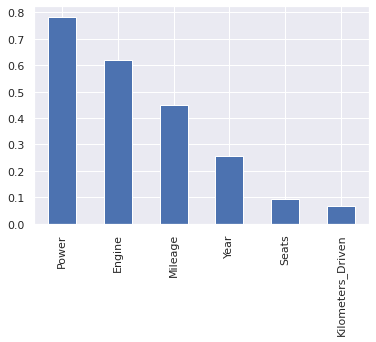

In [318]:
mi.plot.bar()

In [332]:
def run_Linear_Regreesion_model_after_MI_gain(input_k, X_train , X_test , y_train , y_test):
    sel = SelectKBest(mutual_info_regression , k = input_k ).fit(X_train, y_train)
    
    print("The support columns after Mutual info gain are:")
    print(X_train.columns[sel.get_support()])
    print()
    
    print("The Results of REGULAR Linear Regression Model")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print("The R2 score is:" , r2_score(y_test, y_predict))
    print("The RMSE is:" , np.sqrt(mean_squared_error(y_test , y_predict)))
    print("The Standard deviation of y is ",np.std(y))
    print()
    
    print("The Results of Linear Regression Model after MUTUAL INFORMATION GAIN for k =" , input_k , "are: ")
    X_train_input_k = sel.transform(X_train)
    X_test_input_k = sel.transform(X_test)
        
    model = LinearRegression()
    model.fit(X_train_input_k, y_train)
    y_predict = model.predict(X_test_input_k)
    print("The R2 score is:" , r2_score(y_test, y_predict))
    print("The RMSE is:" , np.sqrt(mean_squared_error(y_test , y_predict)))
    print("The Standard deviation of y is ",np.std(y))
    print()
    print("-------------------------------------------------------------------")

run_Linear_Regreesion_model_after_MI_gain(3, X_train , X_test , y_train , y_test)
run_Linear_Regreesion_model_after_MI_gain(4, X_train , X_test , y_train , y_test)
run_Linear_Regreesion_model_after_MI_gain(5, X_train , X_test , y_train , y_test)

The support columns after Mutual info gain are:
Index(['Mileage', 'Engine', 'Power'], dtype='object')

The Results of REGULAR Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model after MUTUAL INFORMATION GAIN for k = 3 are: 
The R2 score is: 0.6141668215654114
The RMSE is: 6.472766020607503
The Standard deviation of y is  10.631763524207654

-------------------------------------------------------------------
The support columns after Mutual info gain are:
Index(['Year', 'Mileage', 'Engine', 'Power'], dtype='object')

The Results of REGULAR Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model after MUTUAL INFORMATION GAIN for k = 4 are: 
The R2 score is: 0.6866026926290021
The RMSE is: 5.8336148618381
The Standard deviation of y is  

## C. Feature Selection using RMSE Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [335]:
mse = []
for feature in X_train.columns:
    clf = LinearRegression()
    clf.fit(X_train[feature].to_frame() , y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test,y_pred))

mse

[99.23652437176308,
 106.24568077661856,
 98.8642664673764,
 60.47942700215359,
 42.78068400175848,
 107.84475380435124]

In [336]:
mse = pd.Series(mse , index = X_train.columns)
mse.sort_values(ascending = False , inplace = True)
mse

Seats                107.844754
Kilometers_Driven    106.245681
Year                  99.236524
Mileage               98.864266
Engine                60.479427
Power                 42.780684
dtype: float64

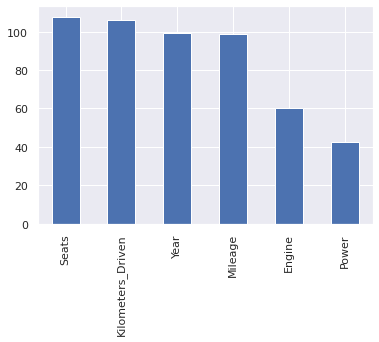

In [337]:
mse.plot.bar()

In [355]:
def run_RMSE_regression_feature_selection(no_of_features , X_train , X_test , y_train , y_test):
    print("The Results of REGULAR Linear Regression Model")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print("The R2 score is:" , r2_score(y_test, y_predict))
    print("The RMSE is:" , np.sqrt(mean_squared_error(y_test , y_predict)))
    print("The Standard deviation of y is ",np.std(y))
    print()

    print("The Results of RMSE regression after feature selection are:")
    print("The Selected Features for RMSE regression are:")
    print(mse[-1:-(no_of_features + 1):-1].index)
    X_train_temp = X_train[mse[-1:-(no_of_features + 1):-1].index]
    X_test_temp = X_test[mse[-1:-(no_of_features + 1):-1].index]
    model = LinearRegression()
    model.fit(X_train_temp , y_train)
    y_predict = model.predict(X_test_temp)
    print("The R2 score is:" , r2_score(y_test, y_predict))
    print("The RMSE is:" , np.sqrt(mean_squared_error(y_test , y_predict)))
    print("The Standard deviation of y is ",np.std(y))
    print()
    print("------------------------------------------------------------------")

run_RMSE_regression_feature_selection(3, X_train , X_test , y_train , y_test)
run_RMSE_regression_feature_selection(4, X_train , X_test , y_train , y_test)
run_RMSE_regression_feature_selection(5, X_train , X_test , y_train , y_test)

The Results of REGULAR Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of RMSE regression after feature selection are:
The Selected Features for RMSE regression are:
Index(['Power', 'Engine', 'Mileage'], dtype='object')
The R2 score is: 0.6141668215654115
The RMSE is: 6.472766020607502
The Standard deviation of y is  10.631763524207654

------------------------------------------------------------------
The Results of REGULAR Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of RMSE regression after feature selection are:
The Selected Features for RMSE regression are:
Index(['Power', 'Engine', 'Mileage', 'Year'], dtype='object')
The R2 score is: 0.6866026926290032
The RMSE is: 5.8336148618380905
The Standard deviation of y is  10.631763524207654

--------------------------------

## 4. Univariate ANOVA Test for Regression

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest , SelectPercentile

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0)

In [364]:
def remove_constant_quasiconstant_duplicate_features(X_train , X_test):
    """ Remove Constant , Quasi-Constant and Duplicate Features"""
    constant_filter = VarianceThreshold(threshold=0.1)
    constant_filter.fit(X_train)
    X_train_filter = constant_filter.transform(X_train)
    X_test_filter = constant_filter.transform(X_test)
    print("X_train.shape , X_test.shape are:",X_train.shape , X_test.shape)

    X_train_T = X_train_filter.T
    X_test_T = X_test_filter.T
    X_train_T =pd.DataFrame(X_train_T)
    X_test_T = pd.DataFrame(X_test_T)

    print("The number of duplicated features in the training dataset are:",X_train_T.duplicated().sum())
    print("The number of duplicated features in the testing dataset are:",X_test_T.duplicated().sum())

    duplicated_features = X_train_T.duplicated()

    features_to_keep = [not index for index in duplicated_features]

    X_train_unique = X_train_T[features_to_keep].T
    X_test_unique = X_test_T[features_to_keep].T

    print("X_train_unique.shape , X_test_unique.shape are:",X_train_unique.shape , X_test_unique.shape)

remove_constant_quasiconstant_duplicate_features(X_train,X_test)

X_train.shape , X_test.shape are: (4722, 6) (1181, 6)
The number of duplicated features in the training dataset are: 0
The number of duplicated features in the testing dataset are: 0
X_train_unique.shape , X_test_unique.shape are: (4722, 6) (1181, 6)


In [365]:
sel = f_regression(X_train , y_train)
sel

(array([ 486.78243735,  124.90577396,  492.17519589, 3689.39687067,
        7250.12212813,   14.75672773]),
 array([9.50462512e-103, 1.21790889e-028, 8.21831414e-104, 0.00000000e+000,
        0.00000000e+000, 1.23915310e-004]))

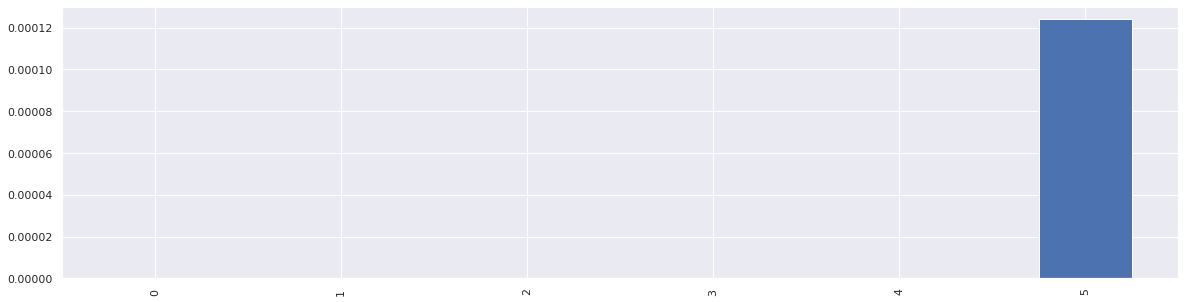

In [366]:
# The 0th position represents the F-score, 1st position represents the p_values
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending = True , inplace = False)
p_values.plot.bar(figsize=(20,5))

In [367]:
p_values

0    9.504625e-103
1     1.217909e-28
2    8.218314e-104
3     0.000000e+00
4     0.000000e+00
5     1.239153e-04
dtype: float64

In [375]:
p_values[p_values<0.00005]

0    9.504625e-103
1     1.217909e-28
2    8.218314e-104
3     0.000000e+00
4     0.000000e+00
dtype: float64

In [378]:
X_train_p = X_train_unique[p_values[p_values<0.00005].index]
X_test_p = X_test_unique[p_values[p_values<0.00005].index]
X_train_p.shape , X_test_p.shape

((4722, 5), (1181, 5))

In [379]:
 def run_model_after_ANOVA_test(X_train_p , X_test_p , X_train , X_test , y_train , y_test):
    print("The Results of REGULAR Linear Regression Model")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print("The R2 score is:" , r2_score(y_test, y_predict))
    print("The RMSE is:" , np.sqrt(mean_squared_error(y_test , y_predict)))
    print("The Standard deviation of y is ",np.std(y))
    print()

    print("The Results of Linear Regression Model after ANOVA Test are:")
    model = LinearRegression()
    model.fit(X_train_p, y_train)
    y_predict = model.predict(X_test_p)
    print("The R2 score is:" , r2_score(y_test, y_predict))
    print("The RMSE is:" , np.sqrt(mean_squared_error(y_test , y_predict)))
    print("The Standard deviation of y is ",np.std(y))
    print()
    print("-------------------------------------------------------------------")
    
run_model_after_ANOVA_test(X_train_p , X_test_p , X_train , X_test , y_train , y_test)

The Results of REGULAR Linear Regression Model
The R2 score is: 0.6943010059050609
The RMSE is: 5.761520716911194
The Standard deviation of y is  10.631763524207654

The Results of Linear Regression Model after ANOVA Test are:
The R2 score is: 0.687626184023584
The RMSE is: 5.824081376419209
The Standard deviation of y is  10.631763524207654

-------------------------------------------------------------------
